In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
from collections import Counter

In [4]:
# Define dataset paths
image_dir = "../data/brain-tumor/train/images"
label_dir = "../data/brain-tumor/train/labels"

# Get image and label filenames
image_files = sorted(os.listdir(image_dir))
label_files = sorted(os.listdir(label_dir))

# Print dataset size
print(f"Total Images: {len(image_files)}")
print(f"Total Labels: {len(label_files)}")

Total Images: 893
Total Labels: 878


In [7]:
# Function to extract class labels
def extract_labels(label_dir):
    labels = []
    
    for label_file in sorted(os.listdir(label_dir)):
        label_path = os.path.join(label_dir, label_file)
        
        with open(label_path, "r") as f:
            first_line = f.readline().strip()  # Read the first line
            class_label = int(first_line.split()[0])  # Extract the first byte (0 or 1)
            labels.append(class_label)
    
    return labels

# Extract labels from dataset
train_labels = extract_labels(label_dir)

# Print sample
print("Sample labels:", train_labels[:10])

Sample labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


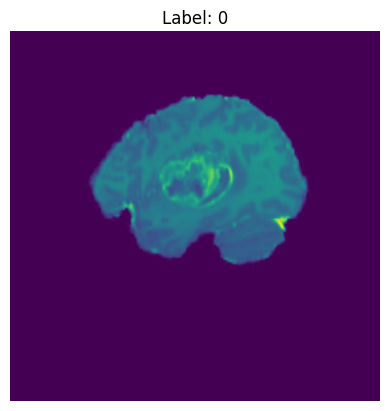

In [13]:
# Read a sample image and its corresponding label
sample_image = os.path.join(image_dir, image_files[42])
sample_label = train_labels[42]

# Open image
image = Image.open(sample_image)


# Display image with label
plt.imshow(image)
plt.title(f"Label: {sample_label}")
plt.axis("off")
plt.show()

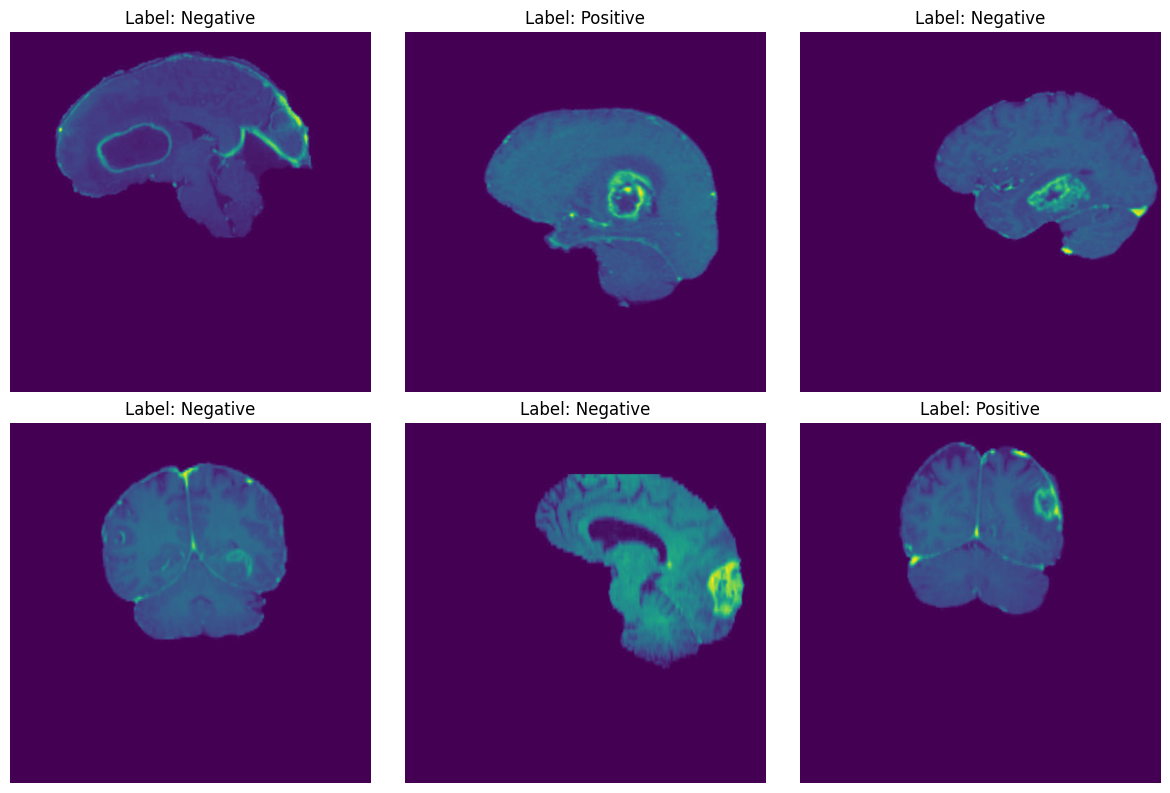

In [14]:
import random
from PIL import Image

# Function to display random samples with labels
def plot_sample_images(image_dir, label_dir, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns
    axes = axes.flatten()

    sample_indices = random.sample(range(len(image_files)), num_samples)

    for i, idx in enumerate(sample_indices):
        img_path = os.path.join(image_dir, image_files[idx])
        label_path = os.path.join(label_dir, label_files[idx])

        # Open image
        img = Image.open(img_path)

        # Extract label
        with open(label_path, "r") as f:
            label = int(f.readline().strip().split()[0])

        # Plot
        axes[i].imshow(img)
        axes[i].set_title(f"Label: {'Positive' if label == 1 else 'Negative'}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# Run function
plot_sample_images(image_dir, label_dir)

In [16]:
import os
from collections import Counter



# Path to training labels
train_label_dir = "../data/brain-tumor/train/labels"  # Update this path

# Function to count positive and negative labels
def count_labels(label_dir):
    label_counts = Counter()
    
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        
        with open(label_path, "r") as f:
            first_line = f.readline().strip()  # Read the first line
            class_label = int(first_line.split()[0])  # Extract the first byte (0 or 1)
            label_counts[class_label] += 1  # Update counter
    
    return label_counts

# Count labels in the training set
train_label_counts = count_labels(train_label_dir)

# Print results
print("Training Dataset Distribution:")
print(f"🔹 Negative (0): {train_label_counts[0]}")
print(f"🔹 Positive (1): {train_label_counts[1]}")

Training Dataset Distribution:
🔹 Negative (0): 419
🔹 Positive (1): 459


In [18]:
import os

# Path to validation annotation files
val_labels_path = "../data/brain-tumor/valid/labels"

# Count classes
negative_count = 0
positive_count = 0

# Iterate through all annotation files
for label_file in os.listdir(val_labels_path):
    with open(os.path.join(val_labels_path, label_file), 'r') as file:
        first_line = file.readline().strip()  # Read the first line
        class_label = int(first_line.split()[0])  # Extract the first value (class)
        if class_label == 0:
            negative_count += 1
        else:
            positive_count += 1

print(f"🔹 Negative (0): {negative_count}")
print(f"🔹 Positive (1): {positive_count}")

🔹 Negative (0): 142
🔹 Positive (1): 81


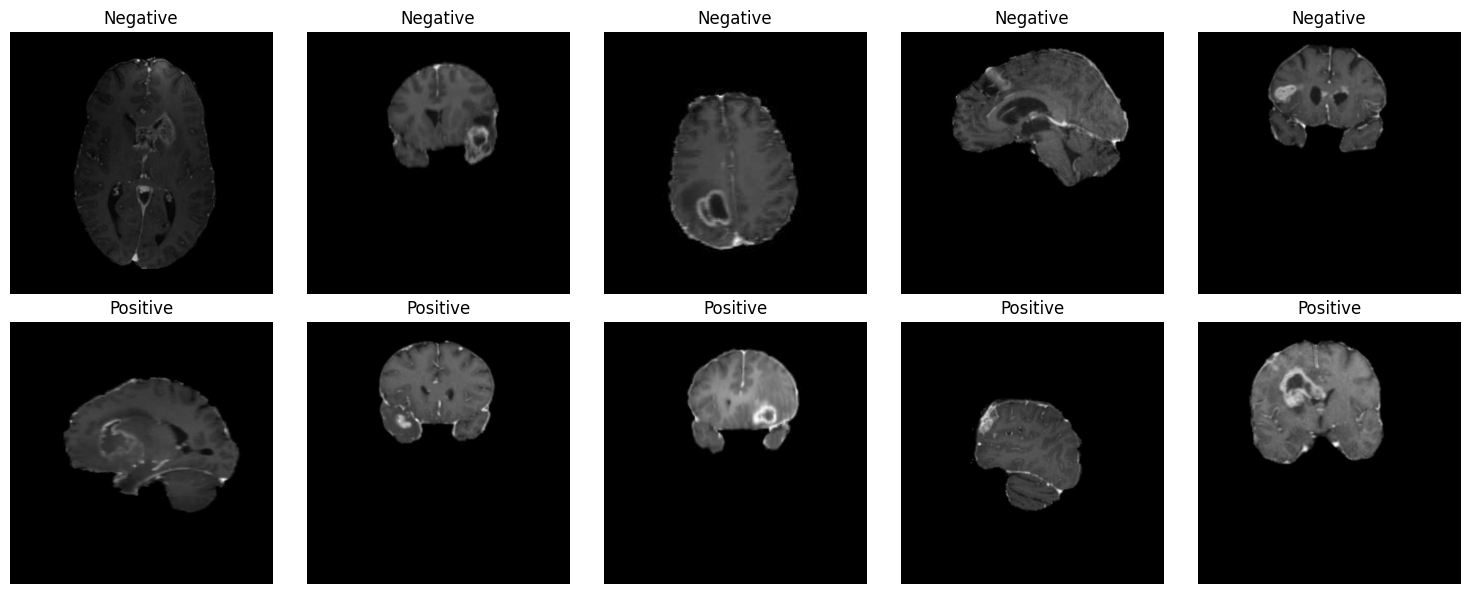

In [23]:
import matplotlib.pyplot as plt
import cv2
import random

# Paths to validation images and labels
val_images_path = "../data/brain-tumor/valid/images"
val_labels_path = "../data/brain-tumor/valid/labels"

# Function to load images of a given class
def load_sample_images(class_label, num_samples=5):
    sample_images = []
    
    for label_file in os.listdir(val_labels_path):
        with open(os.path.join(val_labels_path, label_file), 'r') as file:
            first_line = file.readline().strip()
            label = int(first_line.split()[0])
            if label == class_label:
                image_filename = label_file.replace(".txt", ".jpg")  # Assuming images are .jpg
                image_path = os.path.join(val_images_path, image_filename)
                if os.path.exists(image_path):
                    sample_images.append(image_path)

    return random.sample(sample_images, min(len(sample_images), num_samples))

# Load images
neg_samples = load_sample_images(0)  # Negative samples
pos_samples = load_sample_images(1)  # Positive samples

# Plot images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, img_path in enumerate(neg_samples + pos_samples):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[i // 5, i % 5].imshow(img)
    axes[i // 5, i % 5].axis("off")
    label = "Negative" if i < 5 else "Positive"
    axes[i // 5, i % 5].set_title(label)

plt.tight_layout()
plt.show()

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.19.0'